In [ ]:
import torch

# Ruta al archivo del modelo
path_to_model = 'models/ColorizeArtistic_gen.pth'

# Cargar el state_dict y mostrar sus claves y formas
state_dict = torch.load(path_to_model, map_location=torch.device('cpu'))
model_state_dict = state_dict['model']

# Imprimir las claves y las formas de los parámetros
for key, value in model_state_dict.items():
    print(f"{key}: {value.shape}")


layers.0.0.weight: torch.Size([64, 3, 7, 7])
layers.0.1.weight: torch.Size([64])
layers.0.1.bias: torch.Size([64])
layers.0.1.running_mean: torch.Size([64])
layers.0.1.running_var: torch.Size([64])
layers.0.1.num_batches_tracked: torch.Size([])
layers.0.4.0.conv1.weight: torch.Size([64, 64, 3, 3])
layers.0.4.0.bn1.weight: torch.Size([64])
layers.0.4.0.bn1.bias: torch.Size([64])
layers.0.4.0.bn1.running_mean: torch.Size([64])
layers.0.4.0.bn1.running_var: torch.Size([64])
layers.0.4.0.bn1.num_batches_tracked: torch.Size([])
layers.0.4.0.conv2.weight: torch.Size([64, 64, 3, 3])
layers.0.4.0.bn2.weight: torch.Size([64])
layers.0.4.0.bn2.bias: torch.Size([64])
layers.0.4.0.bn2.running_mean: torch.Size([64])
layers.0.4.0.bn2.running_var: torch.Size([64])
layers.0.4.0.bn2.num_batches_tracked: torch.Size([])
layers.0.4.1.conv1.weight: torch.Size([64, 64, 3, 3])
layers.0.4.1.bn1.weight: torch.Size([64])
layers.0.4.1.bn1.bias: torch.Size([64])
layers.0.4.1.bn1.running_mean: torch.Size([64])
lay

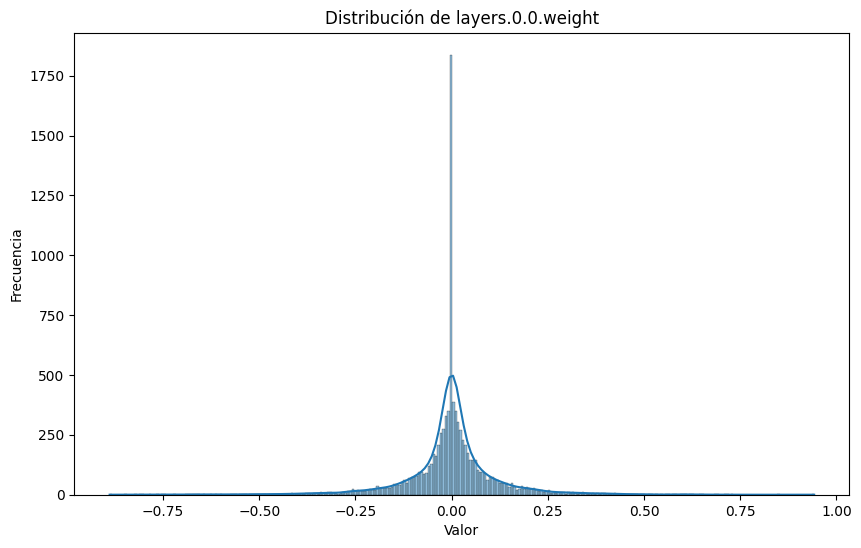

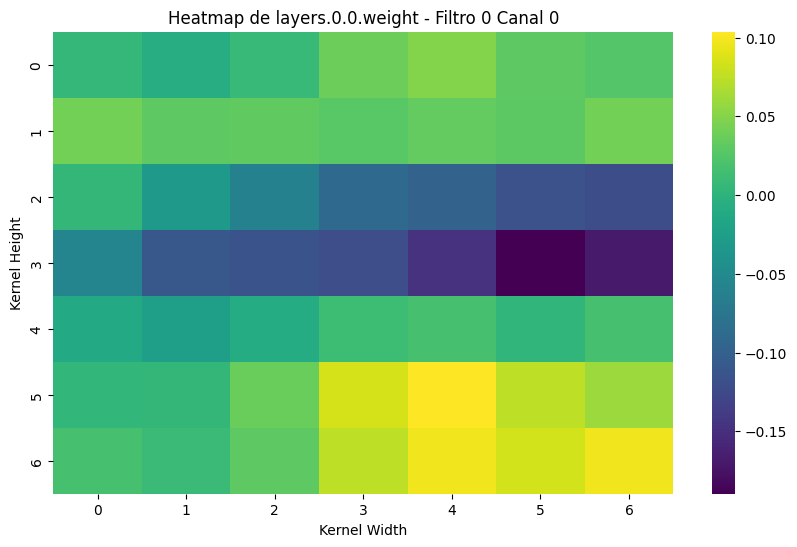

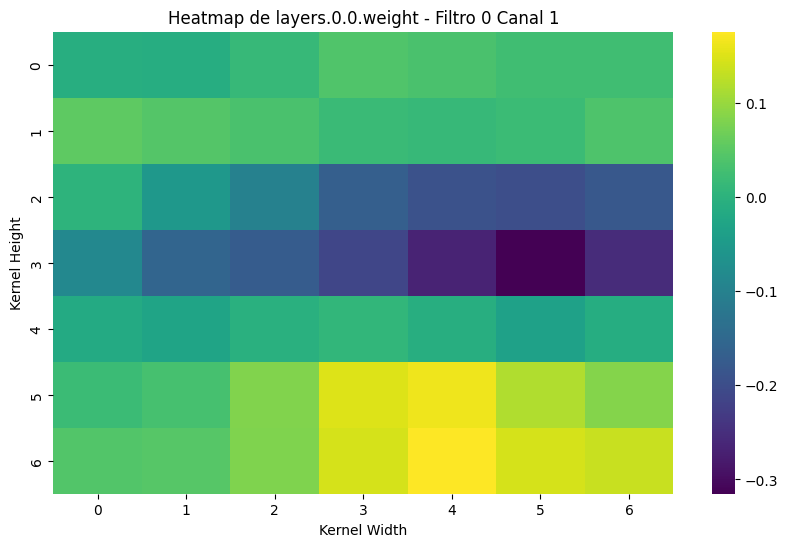

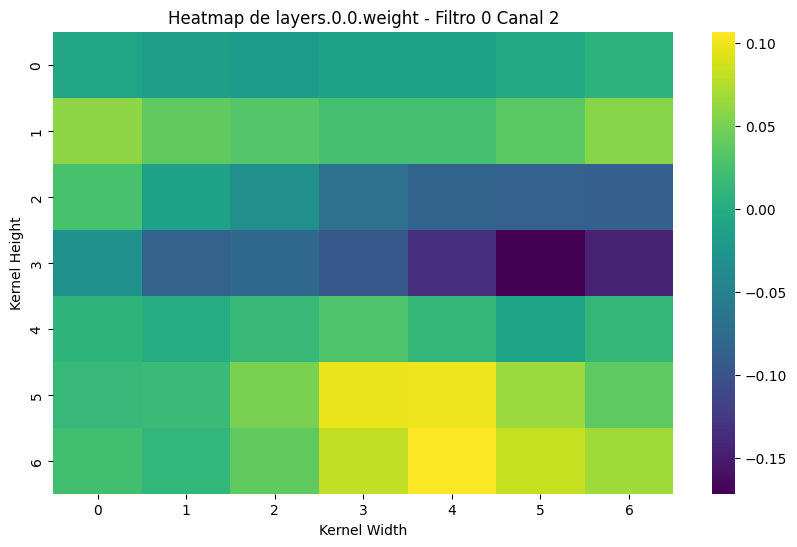

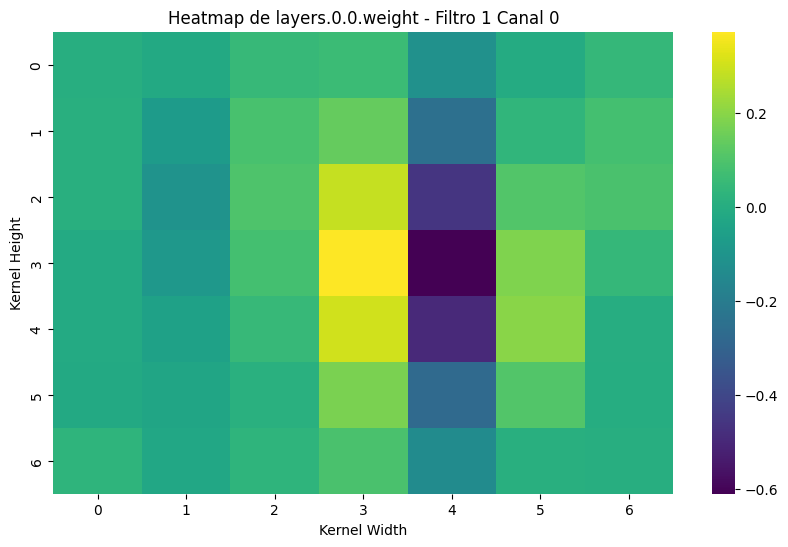

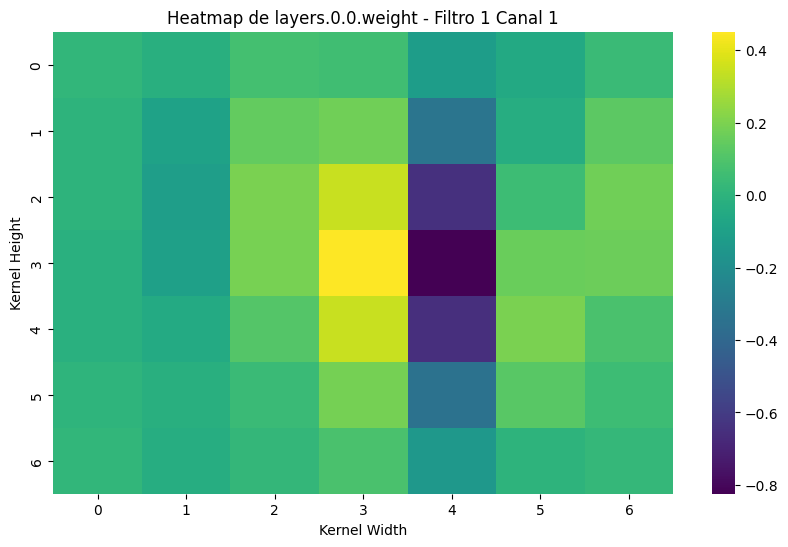

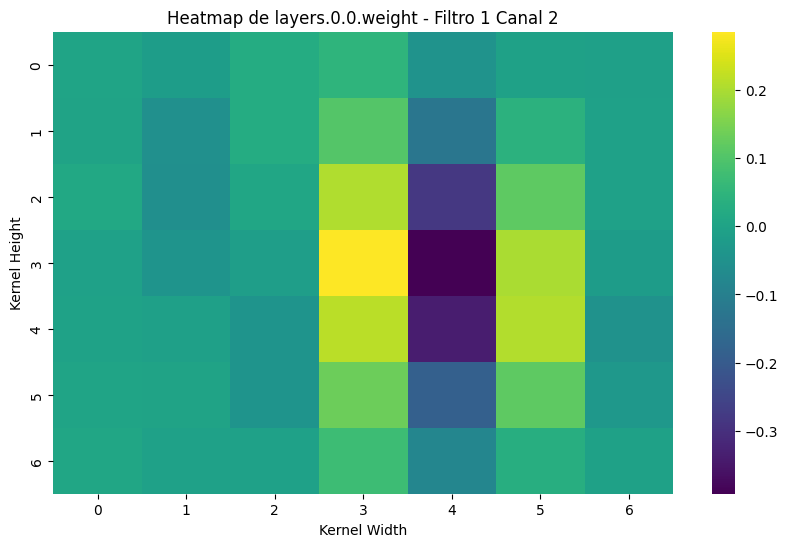

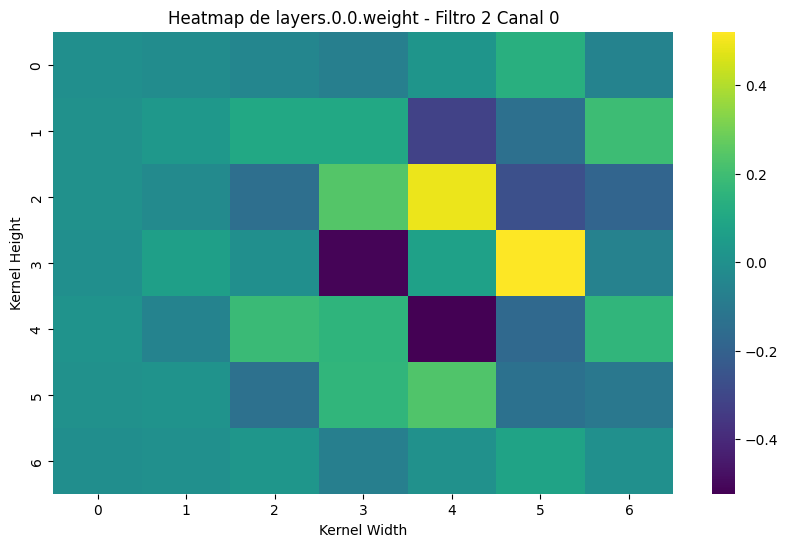

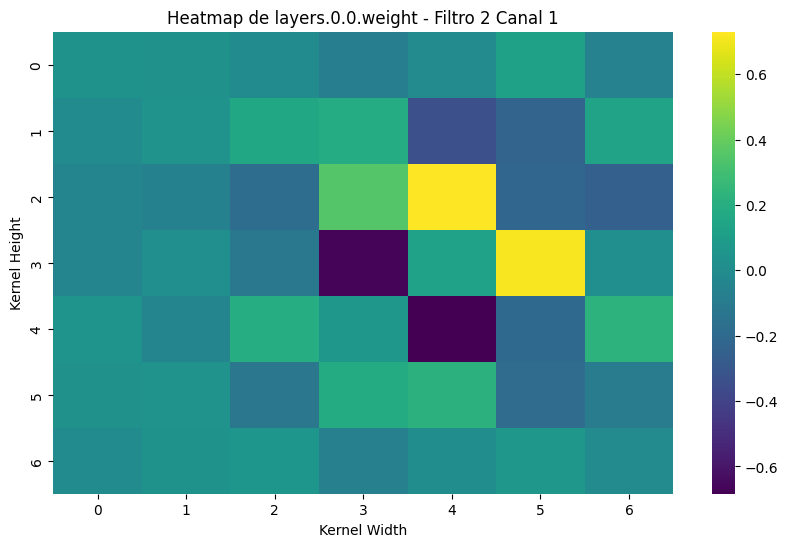

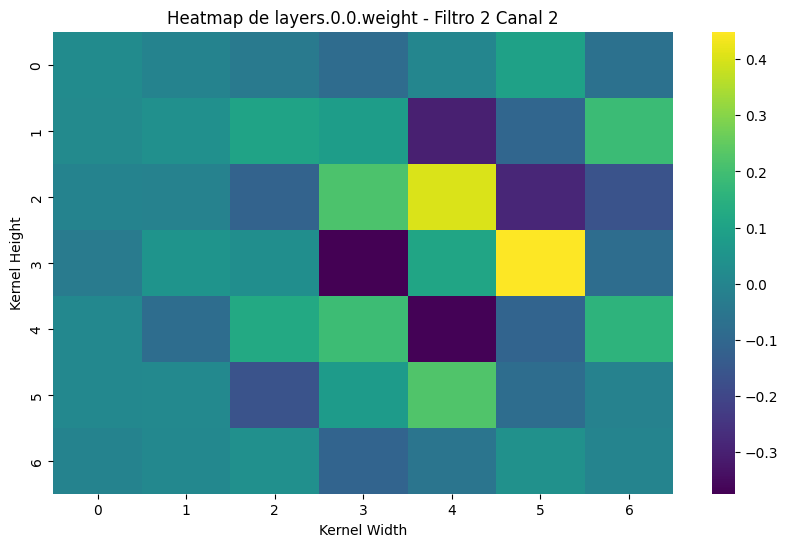

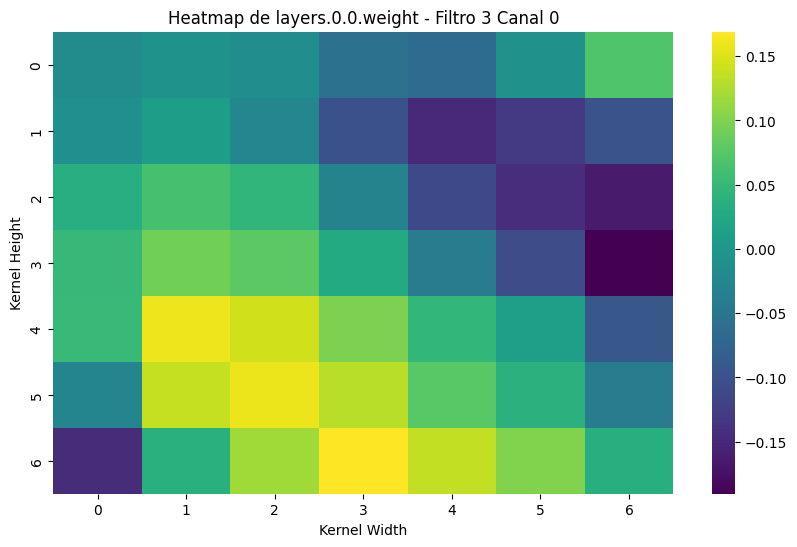

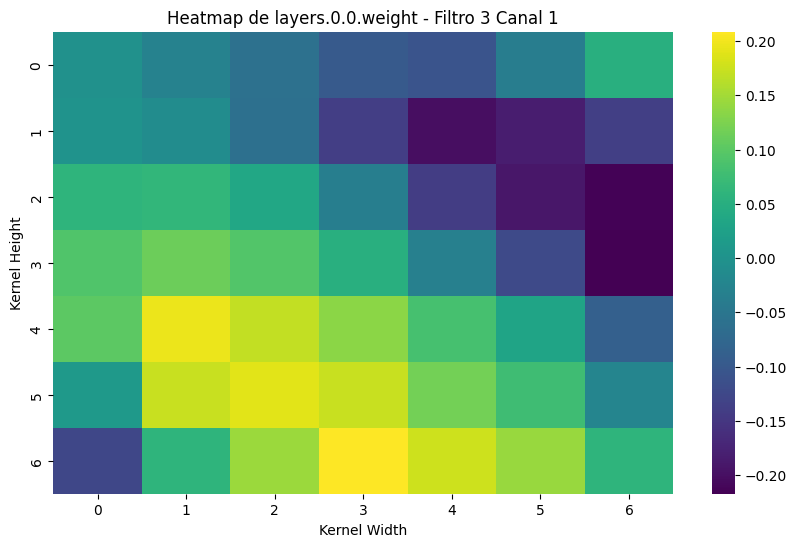

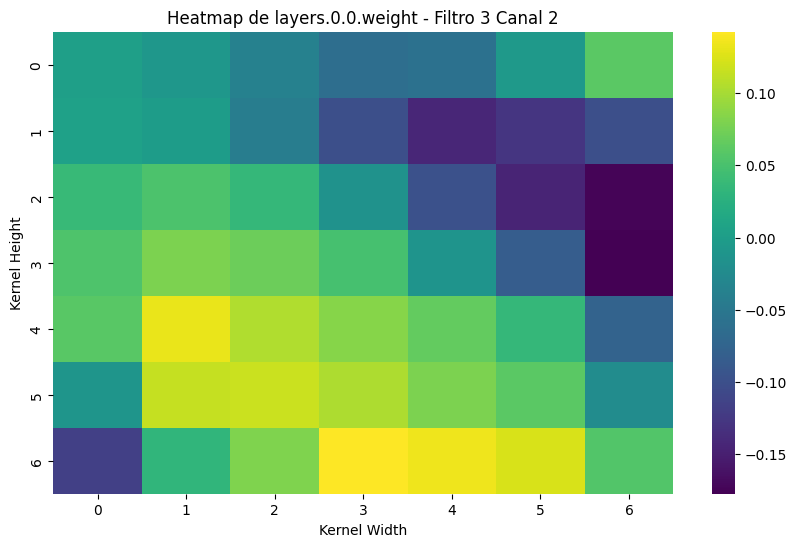

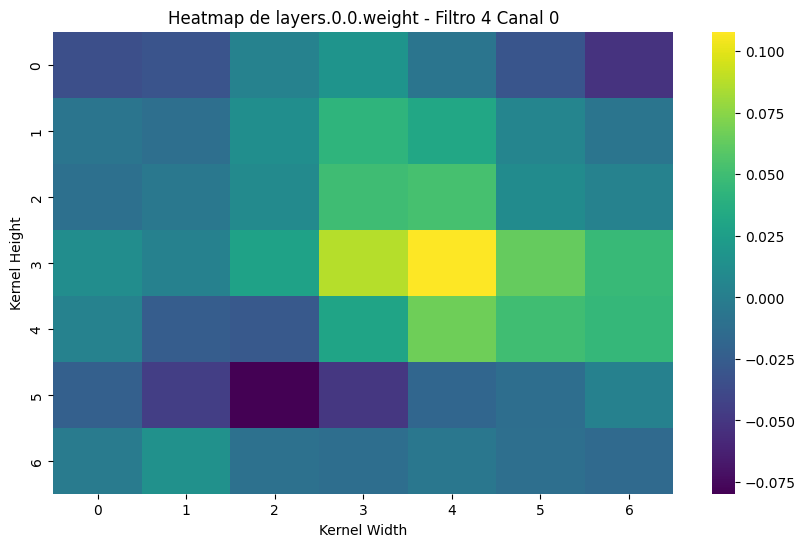

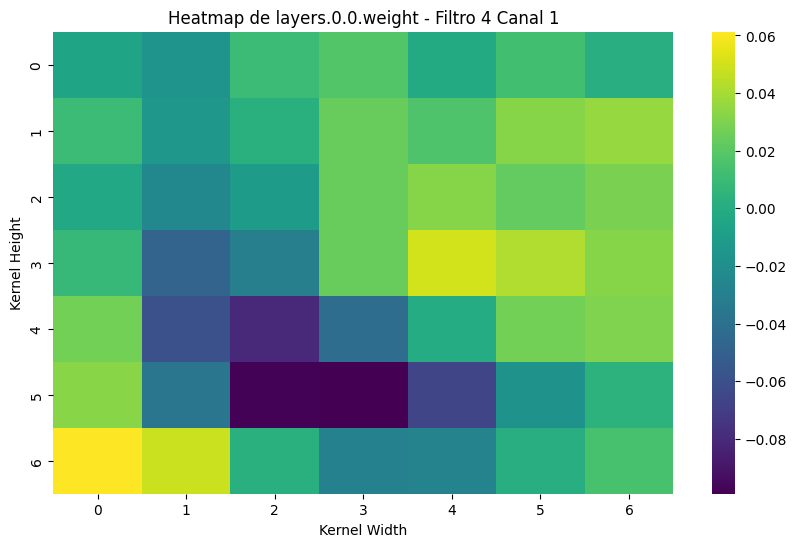

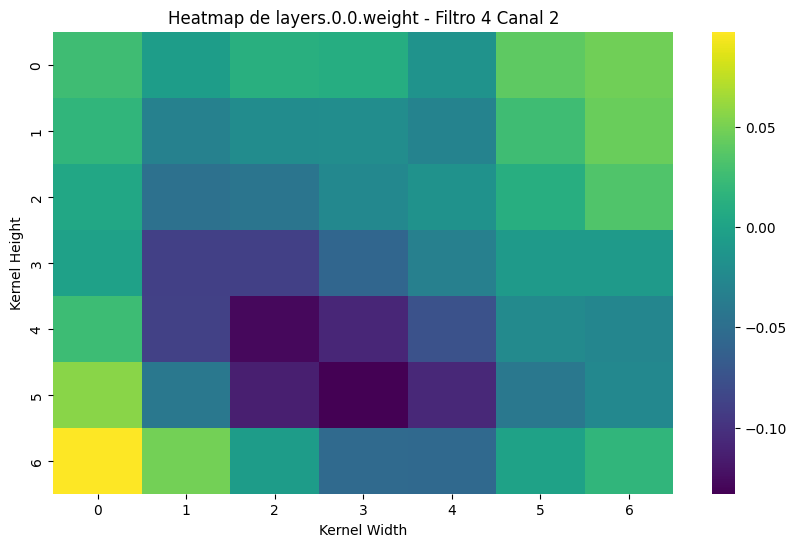

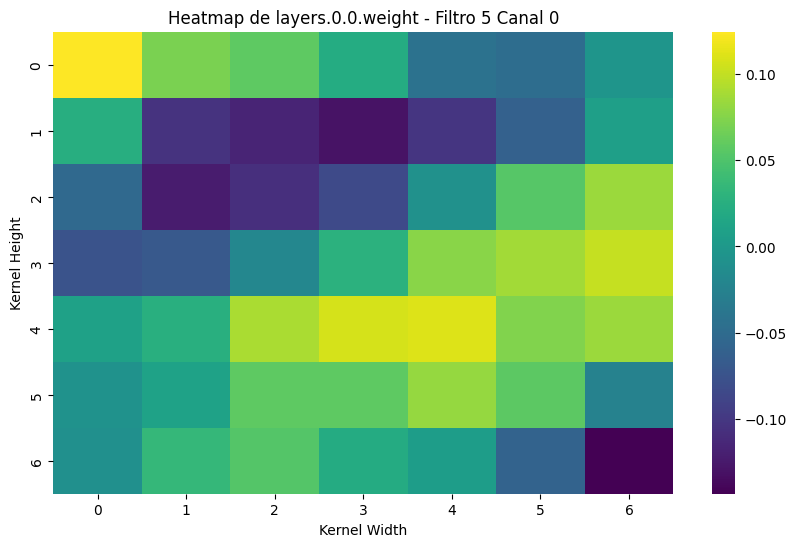

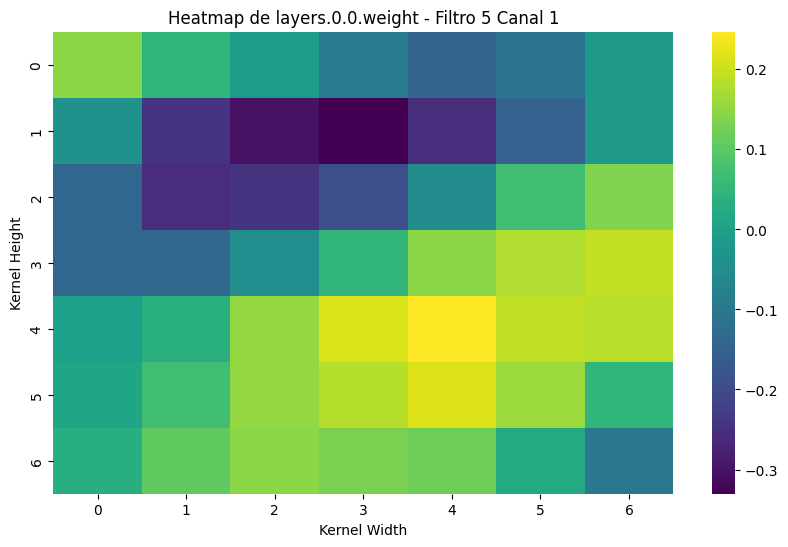

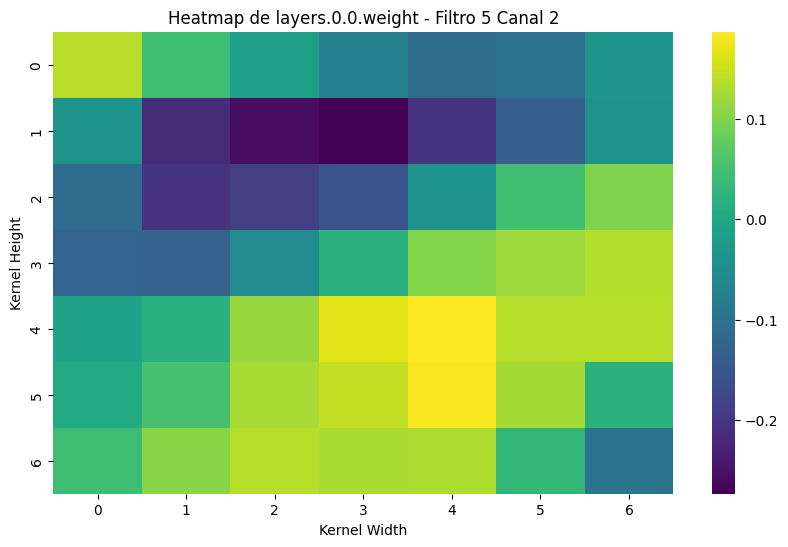

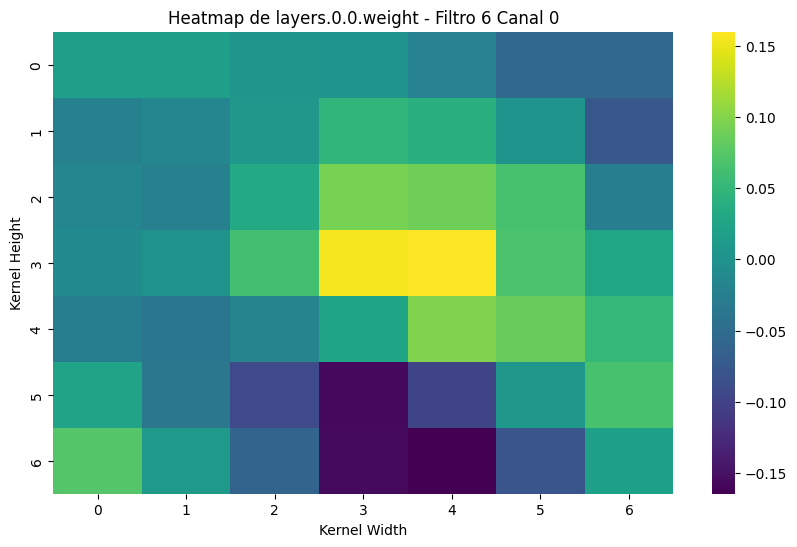

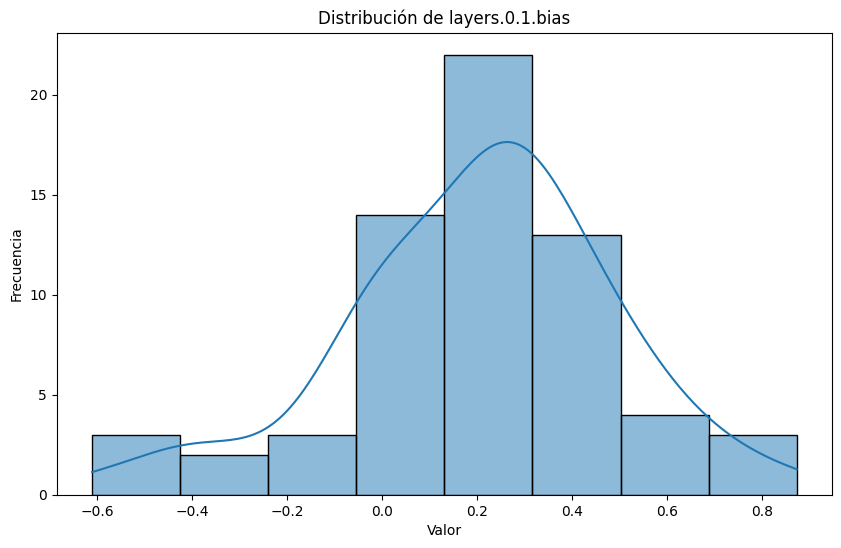

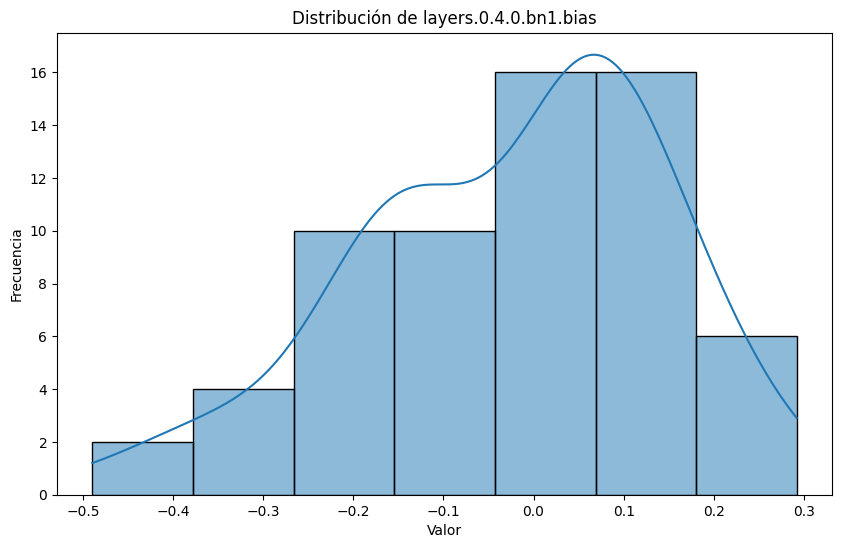

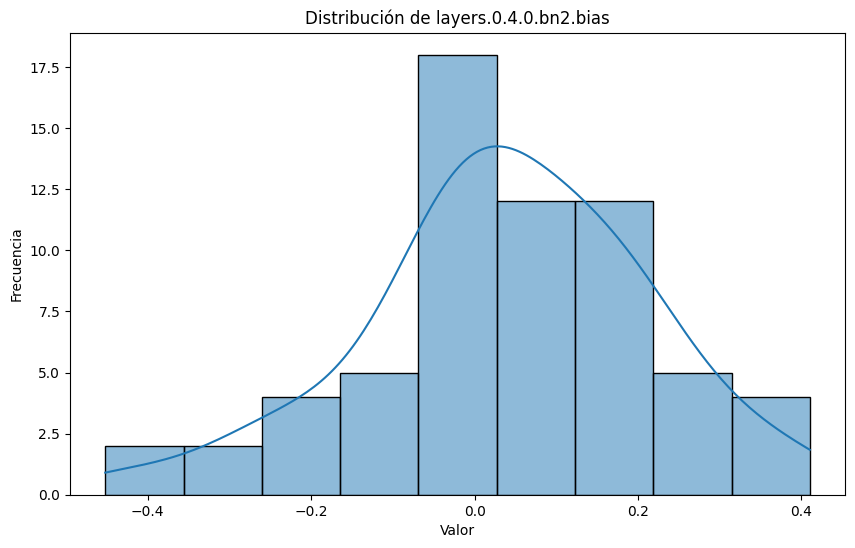

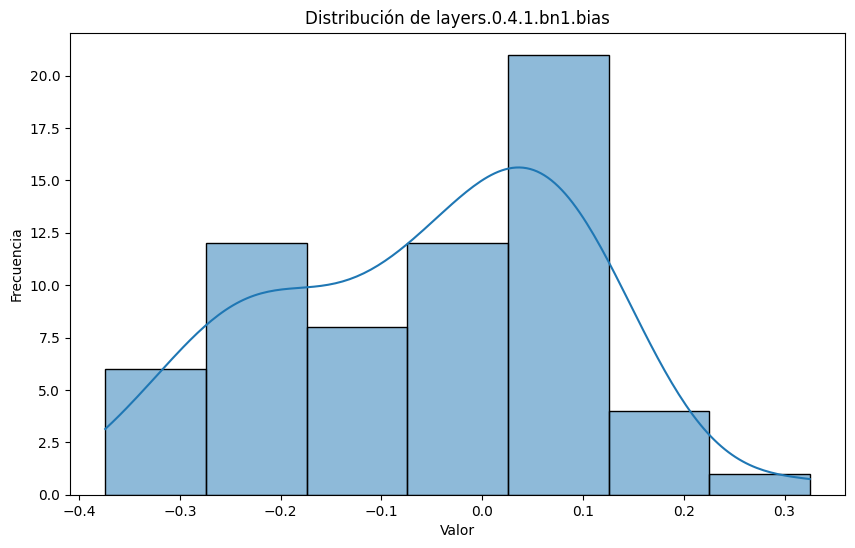

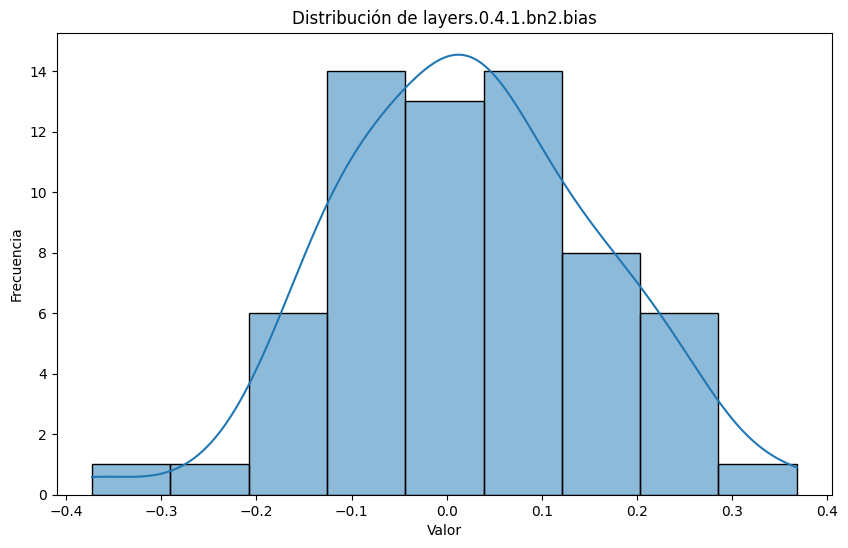

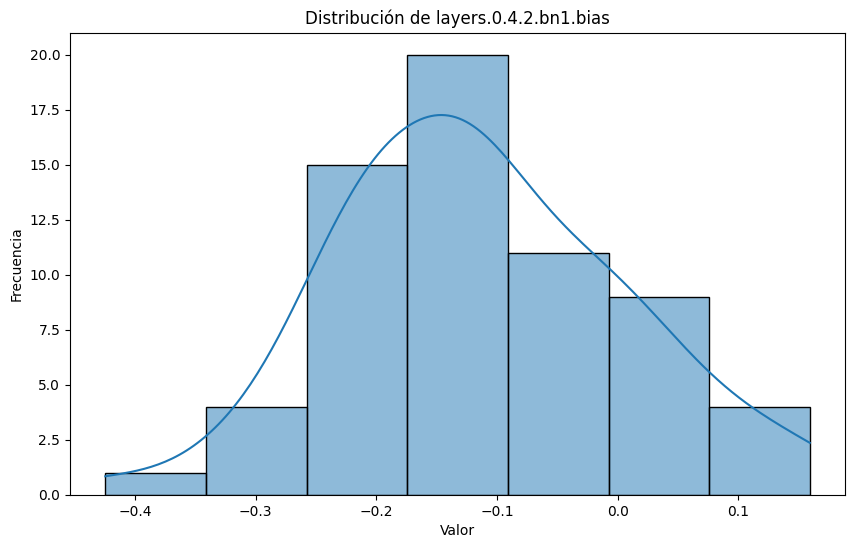

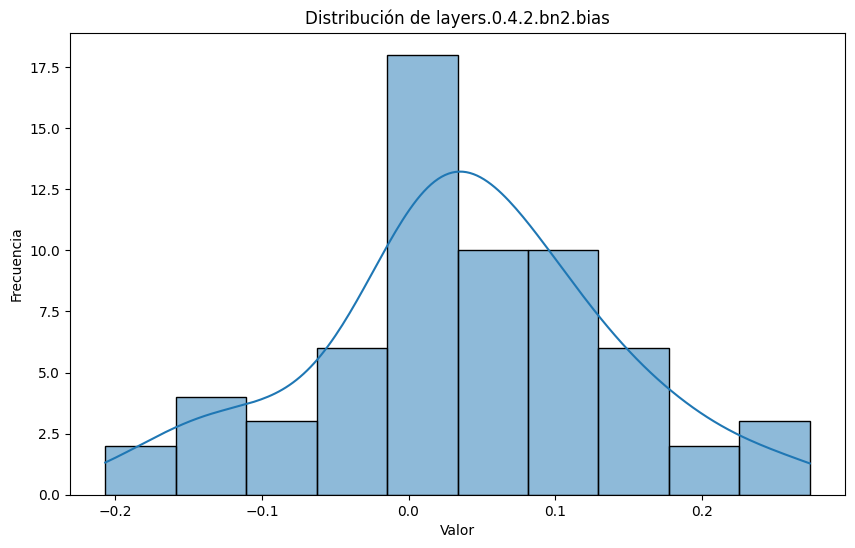

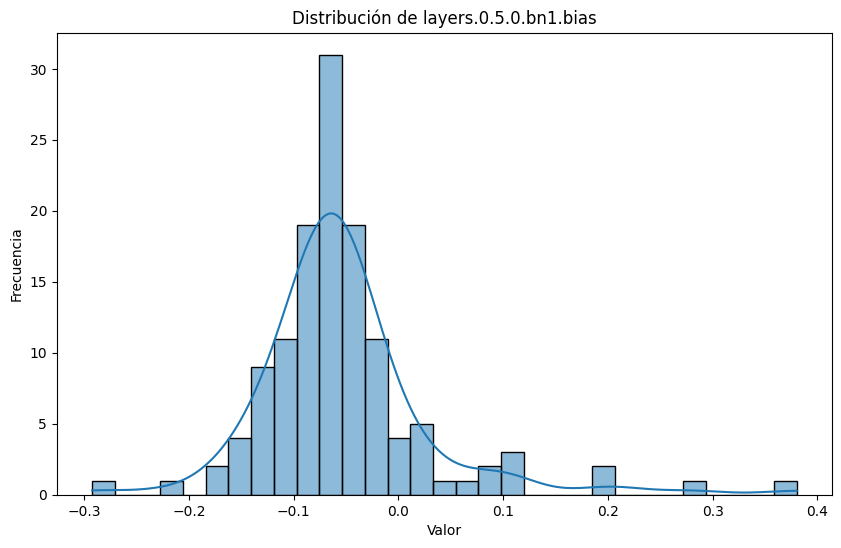

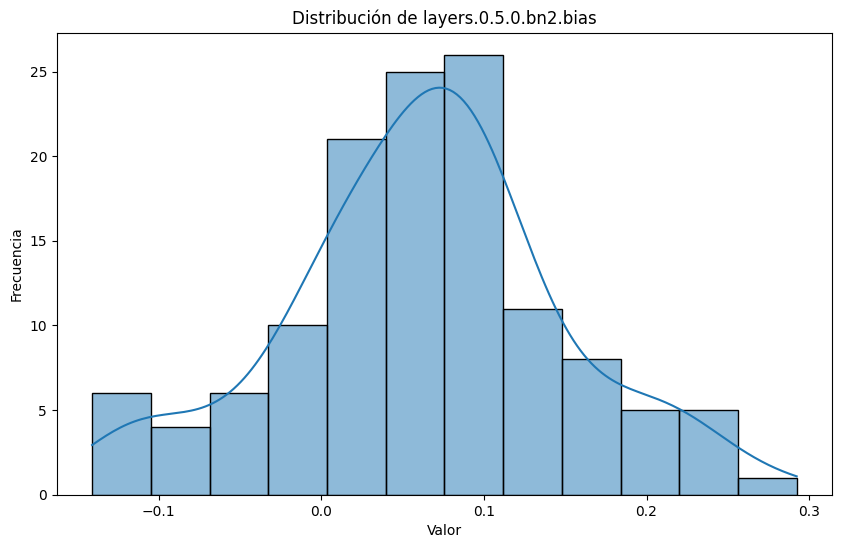

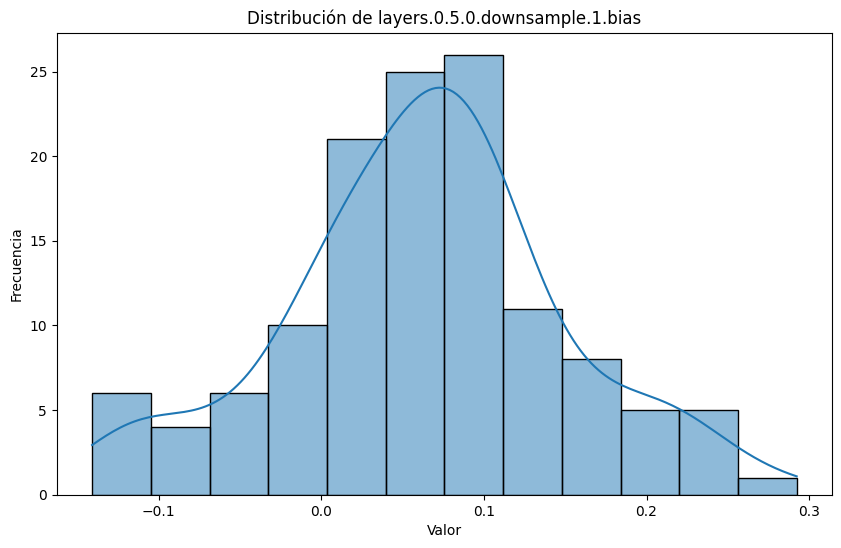

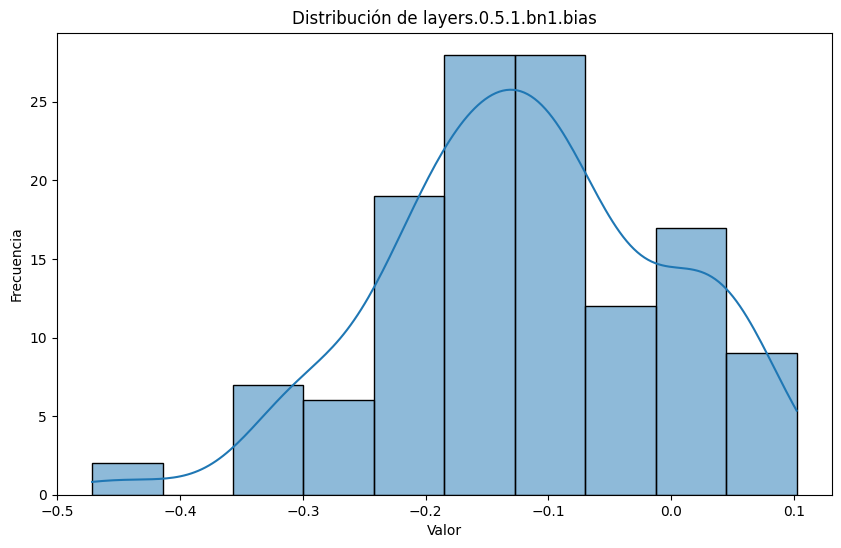

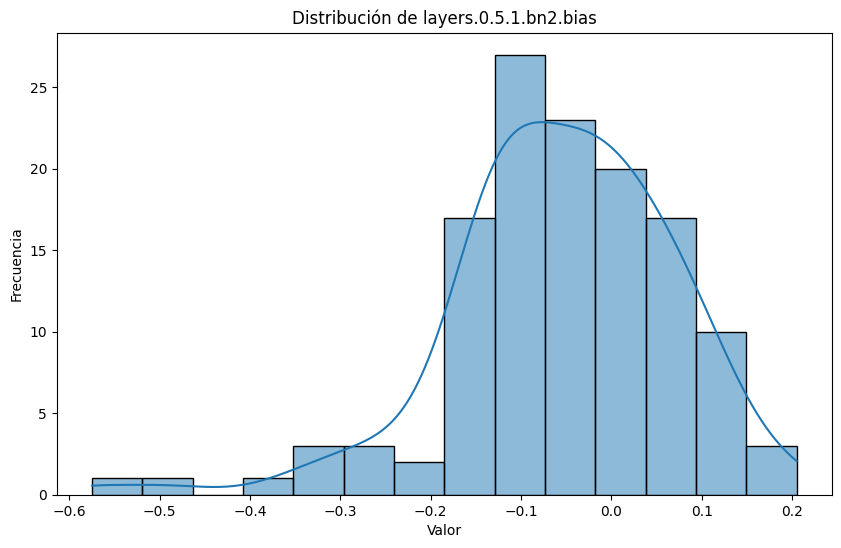

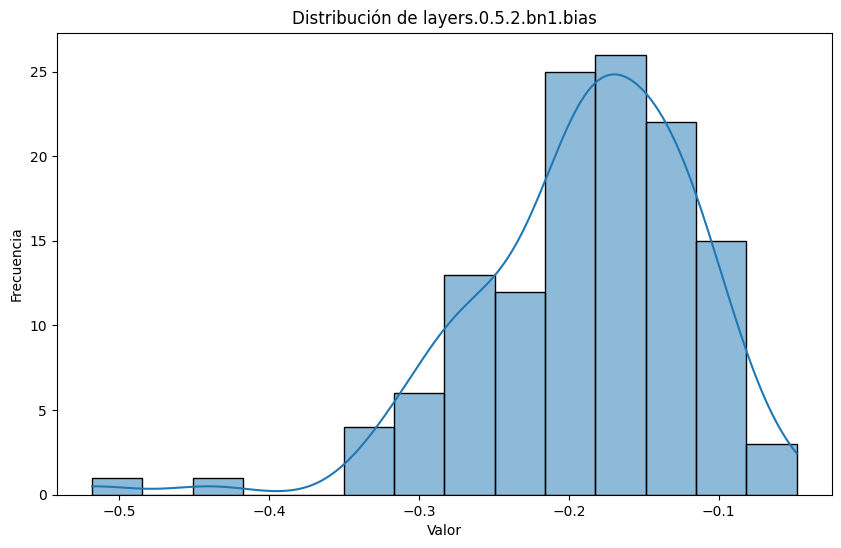

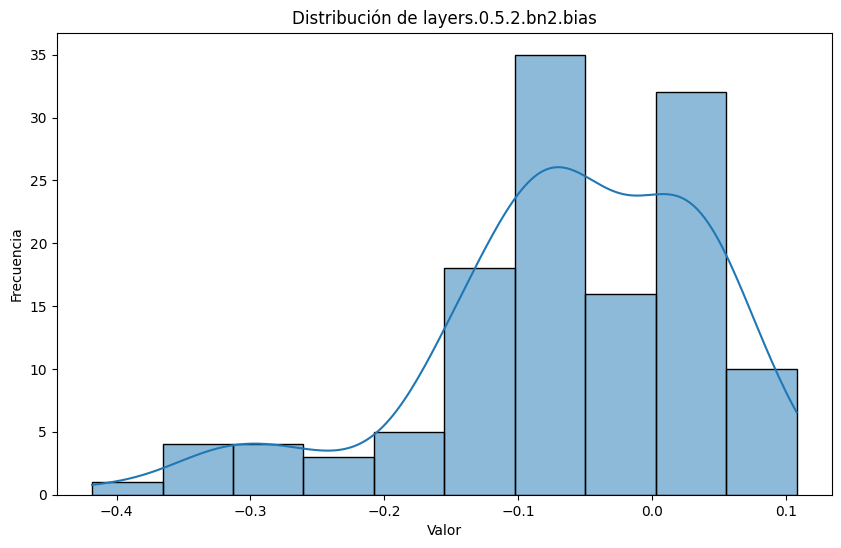

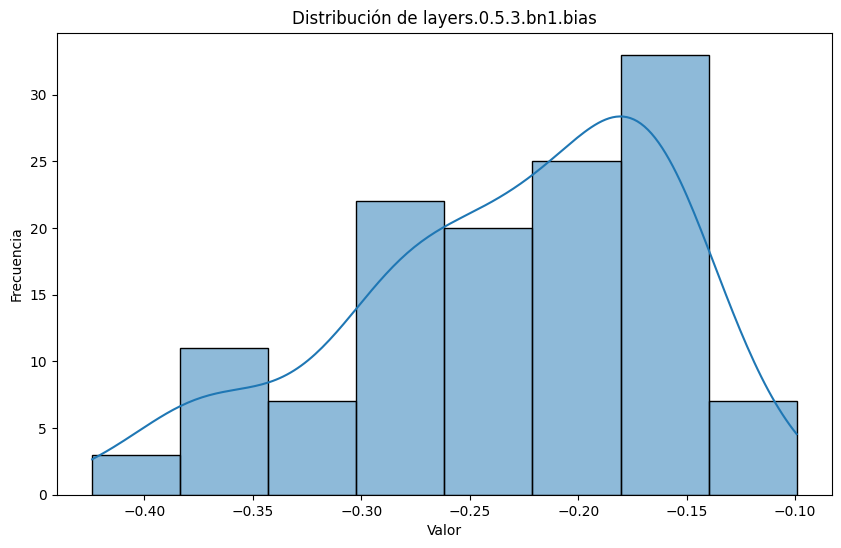

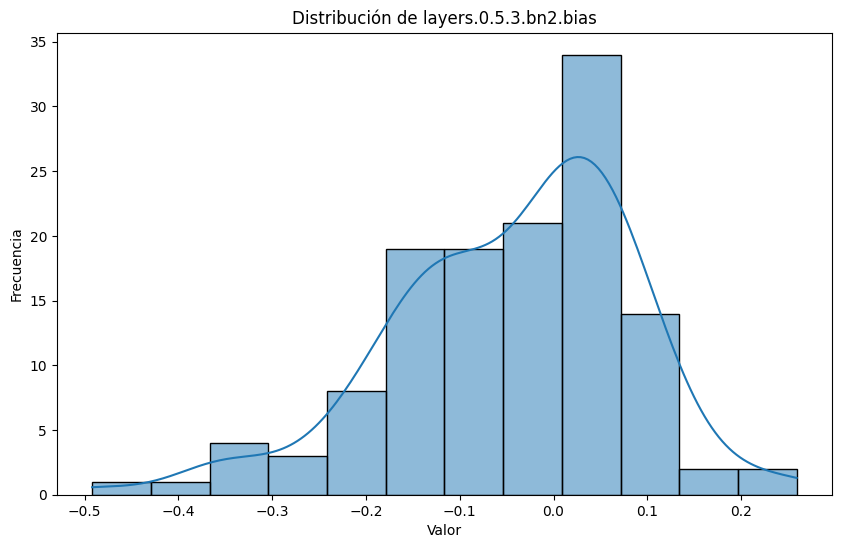

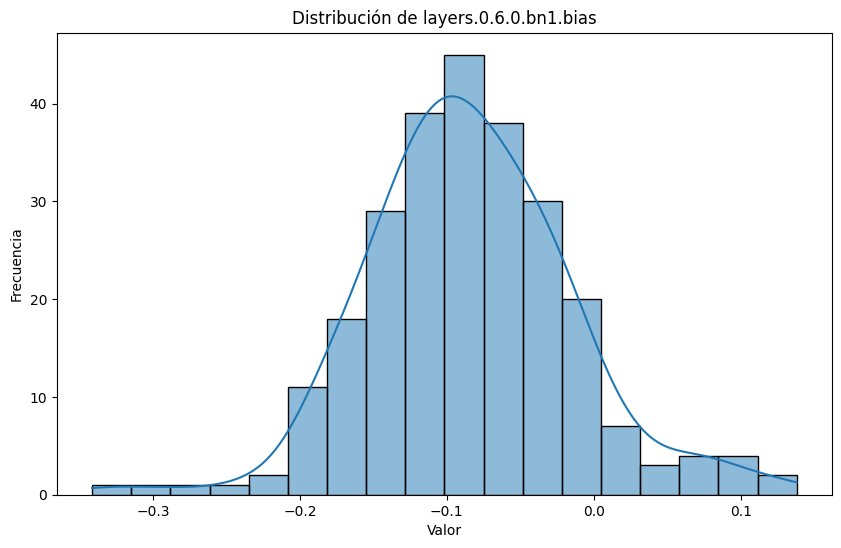

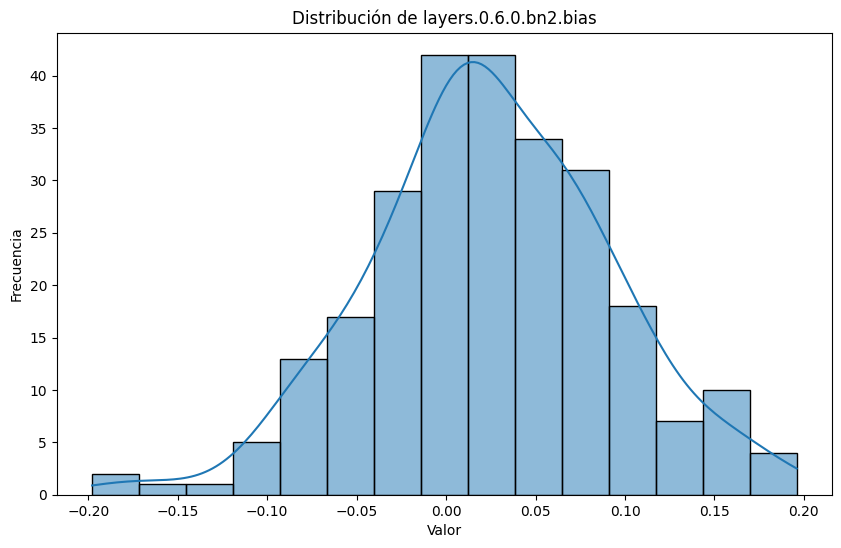

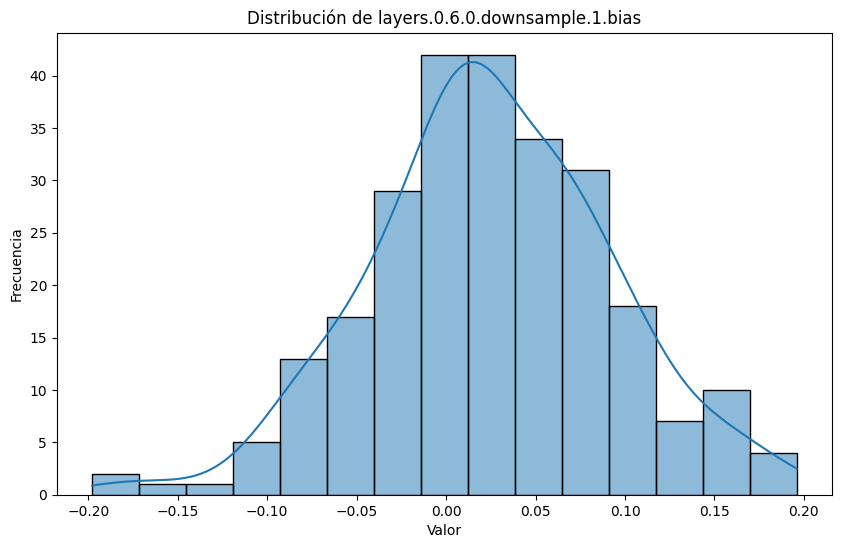

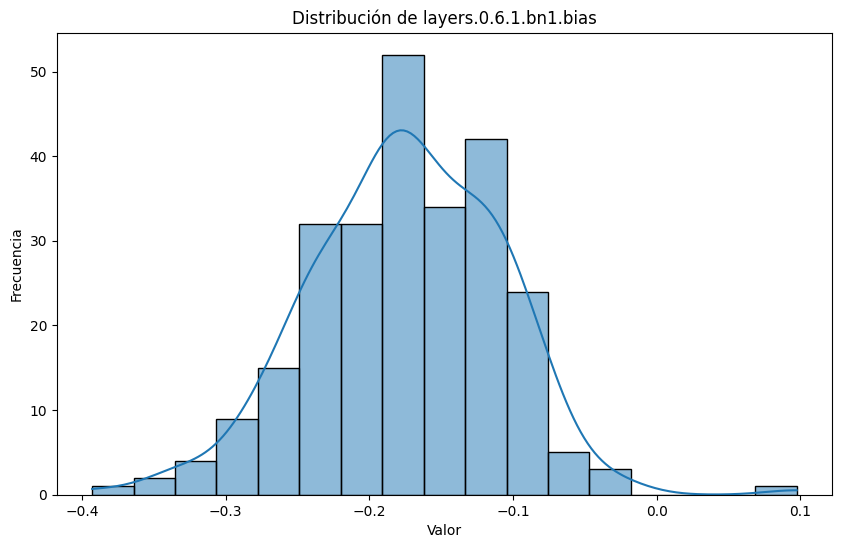

In [22]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta al archivo del modelo
path_to_model = 'models/ColorizeArtistic_gen.pth'

# Cargar el state_dict
state_dict = torch.load(path_to_model, map_location=torch.device('cpu'))
model_state_dict = state_dict['model']

# Imprimir las claves y las formas de los parámetros
for key, value in model_state_dict.items():
    print(f"{key}: {value.shape}")

# Función para visualizar los pesos y biases
def visualize_params(model_state_dict, param_type='weight', max_plots=20):
    plot_count = 0
    for key, value in model_state_dict.items():
        if param_type in key and plot_count < max_plots:
            param_data = value.numpy()
            plt.figure(figsize=(10, 6))
            sns.histplot(param_data.flatten(), kde=True)
            plt.title(f'Distribución de {key}')
            plt.xlabel('Valor')
            plt.ylabel('Frecuencia')
            plt.show()
            plot_count += 1
            if plot_count >= max_plots:
                break

            if len(param_data.shape) == 4:  # Si es una capa convolucional
                num_filters = param_data.shape[0]
                num_channels = param_data.shape[1]
                kernel_height = param_data.shape[2]
                kernel_width = param_data.shape[3]

                # Visualizar un solo filtro
                for i in range(num_filters):
                    for j in range(num_channels):
                        if plot_count >= max_plots:
                            break
                        plt.figure(figsize=(10, 6))
                        sns.heatmap(param_data[i, j], annot=False, cmap='viridis')
                        plt.title(f'Heatmap de {key} - Filtro {i} Canal {j}')
                        plt.xlabel('Kernel Width')
                        plt.ylabel('Kernel Height')
                        plt.show()
                        plot_count += 1

            elif len(param_data.shape) == 2:  # Si es una capa lineal
                plt.figure(figsize=(10, 6))
                sns.heatmap(param_data, annot=False, cmap='viridis')
                plt.title(f'Heatmap de {key}')
                plt.xlabel('Neuronas de Entrada')
                plt.ylabel('Neuronas de Salida')
                plt.show()
                plot_count += 1

        if plot_count >= max_plots:
            break

# Visualizar los pesos, limitando a los primeros 20 gráficos
visualize_params(model_state_dict, 'weight', max_plots=20)

# Visualizar los biases, limitando a los primeros 20 gráficos
visualize_params(model_state_dict, 'bias', max_plots=20)


In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta al archivo del modelo
path_to_model = 'models/ColorizeArtistic_gen.pth'

# Cargar el state_dict
state_dict = torch.load(path_to_model, map_location=torch.device('cpu'))
model_state_dict = state_dict['model']

# Imprimir las claves y las formas de los parámetros
for key, value in model_state_dict.items():
    print(f"{key}: {value.shape}")

# Función para visualizar los pesos y biases
def visualize_params(model_state_dict, param_type='weight'):
    for key, value in model_state_dict.items():
        if param_type in key:
            param_data = value.numpy()
            plt.figure(figsize=(10, 6))
            sns.histplot(param_data.flatten(), kde=True)
            plt.title(f'Distribución de {key}')
            plt.xlabel('Valor')
            plt.ylabel('Frecuencia')
            plt.show()

            if len(param_data.shape) == 4:  # Si es una capa convolucional
                num_filters = param_data.shape[0]
                num_channels = param_data.shape[1]
                kernel_height = param_data.shape[2]
                kernel_width = param_data.shape[3]

                # Visualizar un solo filtro
                for i in range(num_filters):
                    for j in range(num_channels):
                        plt.figure(figsize=(10, 6))
                        sns.heatmap(param_data[i, j], annot=False, cmap='viridis')
                        plt.title(f'Heatmap de {key} - Filtro {i} Canal {j}')
                        plt.xlabel('Kernel Width')
                        plt.ylabel('Kernel Height')
                        plt.show()

# Visualizar los pesos
visualize_params(model_state_dict, 'weight')

# Visualizar los biases
visualize_params(model_state_dict, 'bias')
